### **Maman 11 Q1**

Recording:
[Explanation: ](https://drive.google.com/file/d/1Dq9ZDa9FZ8fxkzKhX799AFIZ6BuAFYXk/view?usp=sharing)



In [ ]:
import torch
from collections import defaultdict
import matplotlib.pyplot as plt

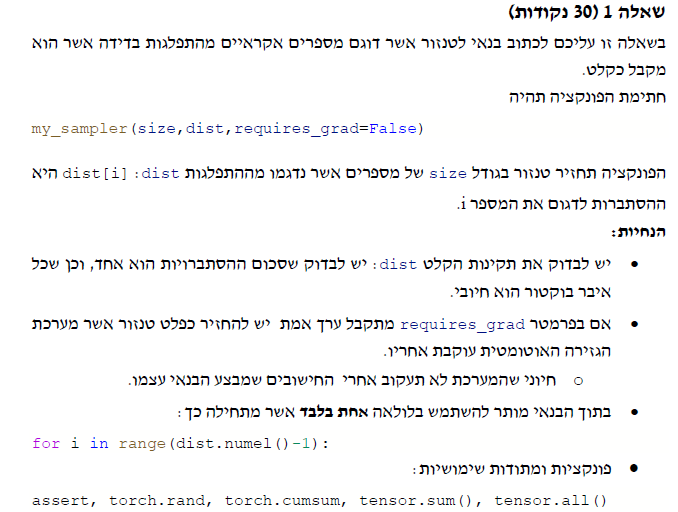

In [ ]:
def my_sampler(size, dist, requires_grad=False):
  dist_tensor = torch.tensor(dist, dtype = torch.double)

  s = sum(dist)
  assert  abs(1 - s) <= 0.000000001, f"Distributions do not sum up to 1! Sum: {s}, Invalid input: {dist}"
  assert torch.all(dist_tensor > 0), f"All distributions must be > 0! Invalid input: {dist}"

  # return a tensor of size = size
  samples = torch.zeros(size, requires_grad = False, dtype=torch.double)
  # partial sums
  sums = torch.cumsum(dist_tensor, dim=0)  # numpy array

  # sample |size| elements from U(0,1)
  u = torch.rand(size)
  print("\nDistribution:", dist_tensor, "\nPartial summation:", sums, sep='\n')

  assert samples.requires_grad == False , f"Requires grad is active during calculations"
  samples = torch.where(u <= sums[0], samples, float(dist_tensor.numel() - 1))
  # print(f"\nCustom probability samples for value 0:", samples, sep='\n')

  for i in range(1, dist_tensor.numel() - 1):
    assert samples.requires_grad == False , f"Requires grad is active during calculations"
    
    bigger_than_prev_cumsum = torch.logical_and(sums[i - 1] <= u, u < sums[i])
    samples = torch.where(bigger_than_prev_cumsum, float(i), samples)
    # print(f"\nCustom probability samples for value {i}:", samples, sep='\n')

  samples.requires_grad = requires_grad
  assert samples.requires_grad == requires_grad , f"Requires grad is not as expected"
  return samples

## **Sanity Check #1 - Distribution that does not sum up to 1 FAILS**

In [ ]:
bad_dist = [0.1, 0.3, 0.7]
bad_res = my_sampler(10000, bad_dist)

AssertionError: ignored

## **Sanity Check #2 - Distribution with 0 values FAILS**

In [ ]:
bad_dist = [0.1, 0.1, 0.7, 0.1, 0.0]
bad_res = my_sampler(10000, bad_dist)

AssertionError: ignored

## **Plot results as a HIST**

In [ ]:

def histogram(tensor, bins=3):
    l = tensor.reshape(-1, ).tolist()
    hn, bins, patches = plt.hist(l,
                                 color='green',
                                 alpha=0.6)
    plt.title('Frequency Histogram\n\n', fontweight="bold")
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()




## **Plot results as a BAR plot of probabilities**

In [ ]:
def plot_probs_bar(vals):
    H, = vals.size()
    xs = list(range(H))
    vals = vals/vals.sum()
    ys = vals.tolist()
    plt.ylim(0, 1)
    plt.bar(xs, ys)
    plt.title('Frequency Bar Graph\n\n', fontweight="bold")
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()




In [ ]:

def check_sampling(probs, custom_dist):
    counter = defaultdict(int)
    for i in range(len(probs)):
        count_i = (custom_dist == i).reshape(-1,).count_nonzero()
        print(f"\'{i}\' count: {count_i}")
        counter[i] = count_i

    print(f"Total count: {sum(counter.values())}")
    vals = torch.Tensor(list(counter.values()))
    return plot_probs_bar(vals)

## Test case 1
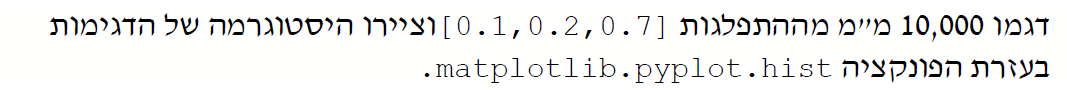



Distribution:
tensor([0.1000, 0.2000, 0.7000], dtype=torch.float64)

Partial summation:
tensor([0.1000, 0.3000, 1.0000], dtype=torch.float64)
True
[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 2.0, 0.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 2.0, 1.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1

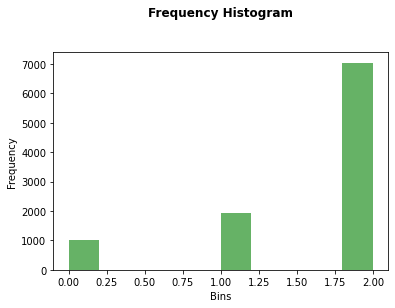

In [ ]:
dist1 = [0.1, 0.2, 0.7]
res1 = my_sampler(10000, dist1, requires_grad=True)
print(res1.requires_grad)
print(res1.tolist())
histogram(res1, len(dist1))

**Check sampling and plot a bar graph**

'0' count: 1018
'1' count: 1938
'2' count: 7044
Total count: 10000


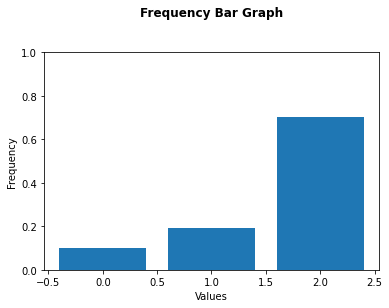

In [ ]:
check_sampling(dist1, res1)

## Test case 2
as in the following example:

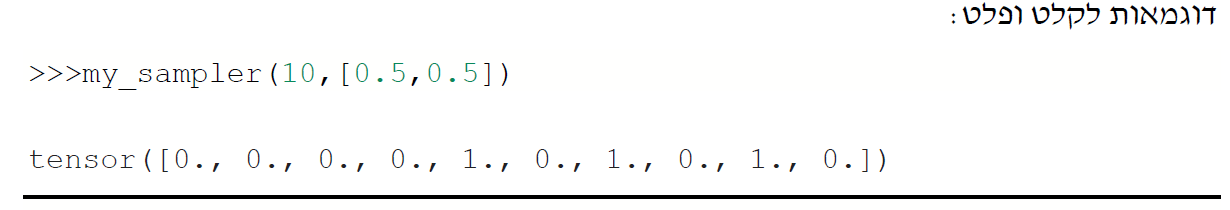


Distribution:
tensor([0.5000, 0.5000], dtype=torch.float64)

Partial summation:
tensor([0.5000, 1.0000], dtype=torch.float64)
tensor([1., 0., 0., 0., 0., 1., 0., 1., 1., 1.], dtype=torch.float64)


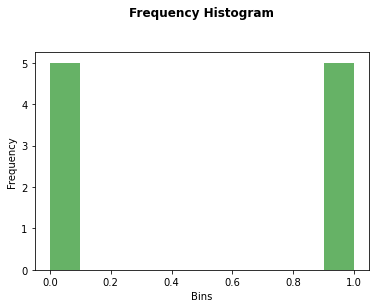

In [ ]:
dist2 = [0.5, 0.5]
res2 = my_sampler(10, dist2)
print(res2)
histogram(res2, len(dist2)) 

**Check sampling and plot a bar graph**

'0' count: 5
'1' count: 5
Total count: 10


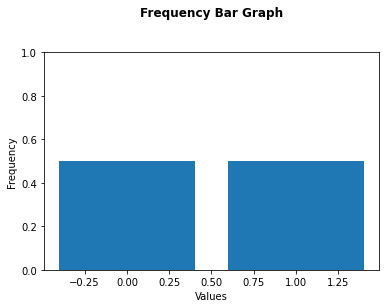

In [ ]:
check_sampling(dist2, res2)

## Test case 3
as in the following example:

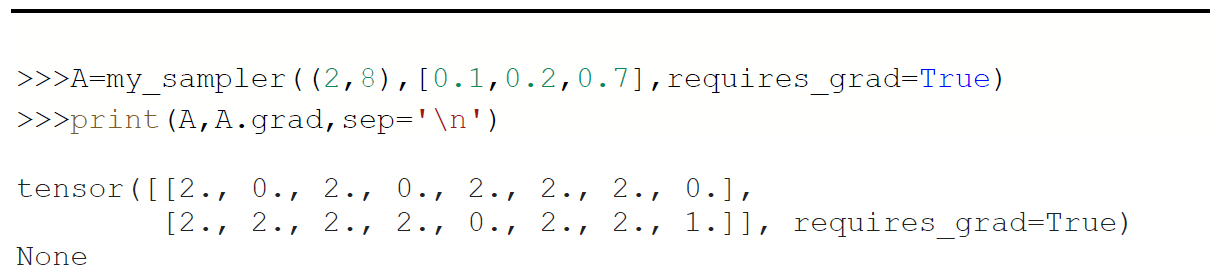


Distribution:
tensor([0.1000, 0.2000, 0.7000], dtype=torch.float64)

Partial summation:
tensor([0.1000, 0.3000, 1.0000], dtype=torch.float64)
tensor([[2., 2., 2., 1., 2., 2., 0., 2.],
        [0., 2., 1., 1., 2., 1., 2., 1.]], dtype=torch.float64,
       requires_grad=True)


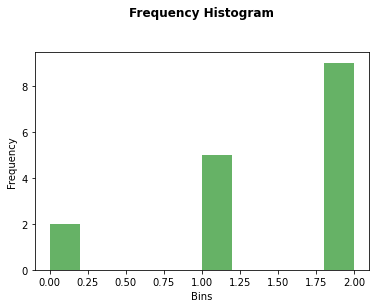

In [ ]:
dist3 = [0.1, 0.2, 0.7]
res3 = my_sampler((2, 8), dist3, requires_grad=True)
print(res3)
histogram(res3, len(dist3))

**Check sampling and plot a bar graph**




'0' count: 2
'1' count: 5
'2' count: 9
Total count: 16


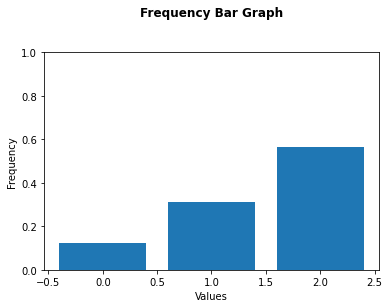

In [ ]:
check_sampling(dist3, res3)

## Test case 4


Distribution:
tensor([0.5000, 0.1000, 0.2000, 0.1000, 0.1000], dtype=torch.float64)

Partial summation:
tensor([0.5000, 0.6000, 0.8000, 0.9000, 1.0000], dtype=torch.float64)
tensor([0., 0., 3., 0., 0., 3., 2., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 3.,
        4., 0., 2., 0., 0., 0., 3., 0., 2., 0., 0., 0., 0., 0., 0., 2., 1., 2.,
        0., 3., 0., 2., 0., 0., 0., 0., 0., 2., 0., 1., 4., 1., 0., 2., 2., 2.,
        4., 0., 0., 0., 2., 0., 3., 0., 2., 0., 0., 0., 0., 4., 4., 3., 4., 2.,
        0., 4., 0., 2., 3., 4., 4., 3., 0., 3., 4., 4., 0., 0., 0., 3., 0., 3.,
        0., 0., 0., 0., 0., 0., 2., 2., 0., 2., 4., 1., 0., 2., 0., 1., 2., 2.,
        0., 2., 0., 2., 3., 1., 0., 3., 0., 2., 0., 0., 4., 2., 0., 3., 2., 4.,
        4., 2., 3., 4., 0., 2., 4., 1., 1., 4., 0., 1., 1., 0., 2., 1., 0., 0.,
        2., 0., 0., 4., 4., 0., 1., 0., 0., 2., 0., 4., 3., 0., 0., 3., 0., 0.,
        1., 1., 3., 0., 2., 2., 0., 0., 3., 2., 0., 4., 1., 4., 0., 0., 2., 0.,
        2., 2., 4., 0., 0

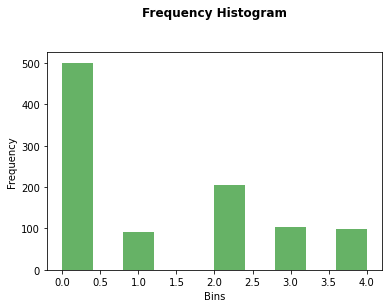

In [ ]:
dist4 = [0.5, 0.1, 0.2, 0.1, 0.1]
res4 = my_sampler(1000, dist4)
print(res4)
histogram(res4, len(dist4))

**Check sampling and plot a bar graph**



'0' count: 501
'1' count: 91
'2' count: 206
'3' count: 103
'4' count: 99
Total count: 1000


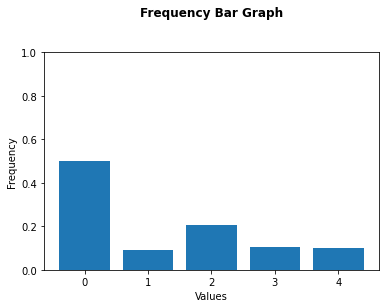

In [ ]:
check_sampling(dist4, res4)

## Test case 5


Distribution:
tensor([0.2000, 0.1000, 0.5000, 0.1000, 0.1000], dtype=torch.float64)

Partial summation:
tensor([0.2000, 0.3000, 0.8000, 0.9000, 1.0000], dtype=torch.float64)
tensor([[[3., 3., 2., 2., 0., 2., 4., 3., 2., 1., 0., 2., 2., 2., 1., 2., 2.,
          0., 2., 2.],
         [0., 2., 2., 2., 2., 2., 0., 0., 2., 3., 0., 2., 0., 4., 0., 2., 3.,
          3., 3., 2.],
         [2., 2., 1., 3., 1., 2., 2., 4., 2., 2., 4., 1., 2., 3., 0., 2., 2.,
          4., 4., 4.],
         [1., 1., 1., 0., 2., 0., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2., 2.,
          2., 1., 2.]],

        [[2., 2., 1., 3., 0., 2., 4., 2., 3., 1., 2., 2., 1., 2., 0., 1., 2.,
          0., 4., 2.],
         [2., 4., 2., 4., 2., 0., 3., 4., 2., 1., 2., 2., 0., 3., 3., 3., 0.,
          1., 0., 4.],
         [1., 2., 0., 2., 2., 2., 2., 2., 0., 3., 2., 4., 0., 2., 0., 2., 2.,
          0., 1., 2.],
         [2., 1., 0., 2., 4., 2., 3., 2., 2., 3., 4., 0., 4., 3., 2., 2., 0.,
          3., 2., 0.]],

        [[2.,

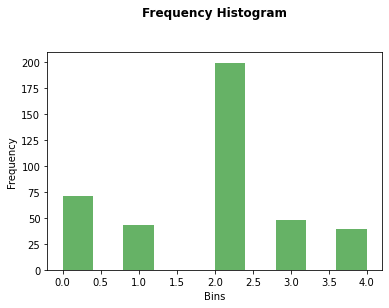

In [ ]:
dist5 = [0.2, 0.1, 0.5, 0.1, 0.1]
res5 = my_sampler((5, 4, 20), dist5)
print(res5)
histogram(res5, len(dist5))

**Check sampling and plot a bar graph**



'0' count: 71
'1' count: 43
'2' count: 199
'3' count: 48
'4' count: 39
Total count: 400


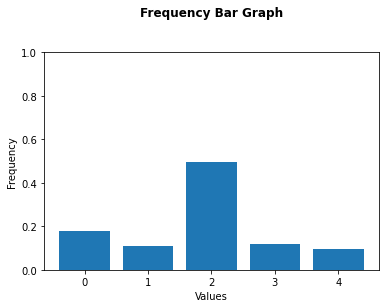

In [ ]:
check_sampling(dist5, res5)